In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [10]:
g = 9.8
def x(t,h):
    return 1/2*(x(t+h)-x(t-h)+g*t**2)

In [11]:
M = 100
x = np.ones([M+1,1],float)
xprime = np.zeros([M+1,1],float)
x[0] = 0
x[-1] = 0
target = 1e-6 
# Main loop
delta = 1.0
while delta>target:
    # Calculate new values of the potential
    for i in range(M+1):
        if i==0 or i==M:
            xprime[i] = x[i]
        else:
            xprime[i] = 1/2*(x[i+1] + x[i-1]+g*(0.1)**2)
    # Calculate maximum difference from old values
    delta = max(abs(x-xprime))
    # Swap the two arrays around
    x,xprime = xprime,x

Text(0.5, 0, 'time')

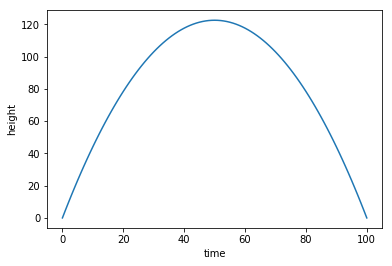

In [12]:
plt.plot(x)
plt.ylabel("height")
plt.xlabel("time")

In [3]:
#Q2
data= np.loadtxt("particles.dat")

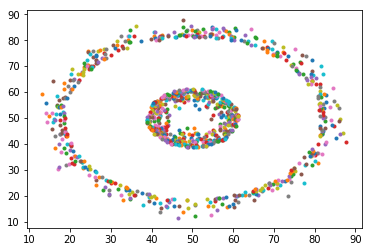

In [24]:
for i in range(1000):
    plt.plot(data[i][0],data[i][1],'.')
    
    

In [4]:
a = np.linspace(0.5,99.5,100)
d = np.zeros((100,100))

In [5]:
for i in data:
    x_c = int(i[0]-0.5)
    y_c = int(i[1]-0.5)
    d_x = (i[0]-a[x_c])
    d_y = (i[1]-a[y_c])
    t_x = 1-d_x
    t_y = 1-d_y
    d[x_c][y_c] = d[x_c][y_c] + t_x*t_y
    d[x_c+1][y_c] = d[x_c+1][y_c] + d_x*t_y
    d[x_c][y_c+1] = d[x_c][y_c+1] + t_x*d_y
    d[x_c+1][y_c+1] = d[x_c+1][y_c+1] + d_x*d_y
    
d = d*1.60217662*10**(-7)/(8.8541878128)

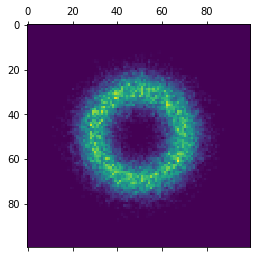

In [6]:
plt.matshow(d)

7187


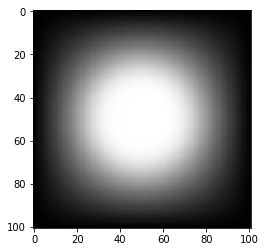

In [10]:
# Constants
M = 100         # Grid squares on a side
target = 1e-9   # Target accuracy

# Create arrays to hold potential values
phi = np.zeros((M+1,M+1),float)
phiprime = np.zeros((M+1,M+1),float)
count = 0
# Main loop
delta = 1.0
while delta>target:
    count += 1
    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1] + d[i,j])/4
    
    # Calculate maximum difference from old values
    delta = abs(phi-phiprime).max()
    #print(delta)
    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
plt.imshow(phi)
plt.gray()
print(count)

473


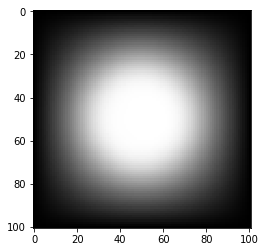

In [62]:
# Constants
M = 100         # Grid squares on a side
target = 1e-10   # Target accuracy
w = 0.9
# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phiprime = np.zeros([M+1,M+1],float)
count = 0
# Main loop
delta = 1.0
while delta>target:
    count += 1
    delta_array = []
    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phi[i,j] = phi[i,j]
            else:
                temp = (phi[i+1,j] + phi[i-1,j]+ phi[i,j+1] + phi[i,j-1] + d[i,j])*(1+w)/4 - w*phi[i,j]
                delta_array.append(abs(phi[i,j]-temp))
                phi[i,j] = temp
    
    # Calculate maximum difference from old values
    delta = max(delta_array)

# Make a plot
plt.imshow(phi)
plt.gray()
print(count)

In [63]:
# Golden-section search 
def GSS_iter( xL, xR, es ):
    result = []
    phi = (1.0 + sqrt(5.0))/2.0
    iter = 1
    err = 100.0 # Initial error (%)

     # Print column headers
    print('Iter.','xopt','f(xopt)','Error %')

     # Iterate until termination criterion is reached
    while err > es:
 
        d = (phi - 1)*(xR - xL)
        a = xR - d
        b = xL + d
        funcb = func(b)
        funca = func(a)
        result.append([b,funcb])
        result.append([a,funca])
        #print(funcb,funca)
        if funcb > funca:
            xopt = a
            xR = b
        else:
            xopt = b
            xL = a
        err = ((2.0 - phi)*abs((xR - xL)/xopt))*100.0

         # Print iteration, x-optimal, f(x-optimal), %Error 
        print(int(iter),round(xopt, 4),round(func(xopt),4),round(err, 5))
        iter += 1
    return xopt,result

# Function to evaluate for max[f(x)]
def func( w ):
    # Constants
    M = 100         # Grid squares on a side
    target = 1e-10   # Target accuracy
    # Create arrays to hold potential values
    phi = np.zeros([M+1,M+1],float)
    phiprime = np.zeros([M+1,M+1],float)
    count = 0
    # Main loop
    delta = 1.0
    while delta>target:
        count += 1
        delta_array = []
        # Calculate new values of the potential
        for i in range(M+1):
            for j in range(M+1):
                if i==0 or i==M or j==0 or j==M:
                    phi[i,j] = phi[i,j]
                else:
                    temp = (phi[i+1,j] + phi[i-1,j]+ phi[i,j+1] + phi[i,j-1] + d[i,j])*(1+w)/4 - w*phi[i,j]
                    delta_array.append(abs(phi[i,j]-temp))
                    phi[i,j] = temp
        # Calculate maximum difference from old values
        delta = max(delta_array)
    return count

###############################################
es = 0.1 # Stopping criterion
xL = 0.85 # Initial guesses
xR = 1

# Call the iterative solver
xopt,result = GSS_iter(xL, xR, es)



Iter. xopt f(xopt) Error %
1 0.9427 217 3.75623
2 0.9427 217 2.32148
3 0.9427 217 1.43475
4 0.9427 217 0.88673
5 0.9427 217 0.54803
6 0.9427 217 0.3387
7 0.9407 208 0.20977
8 0.9407 208 0.12964
9 0.9415 203 0.08006


In [61]:
xopt

0.9414855054991168

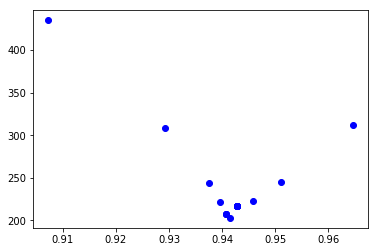

In [67]:
for i in result:
    plt.plot(i[0],i[1],'bo')